<a href="https://colab.research.google.com/github/RadJeff7/QM1-Spotify-Analysis/blob/main/QM1_Spotify_Decade_Analysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# <font color=green>Analyzing the Top Songs of the Decade on Spotify</font>




**<font color=green>Spotify</font>** is a digital music streaming service. It gives us instant access to its vast online library of music and podcasts, allowing us to listen to any content of our choice at any time.


One can find millions of songs from a variety of genres and artists: from obscure indie rock, to top 40 pop, to movie soundtracks and classical music. It also has a complex algorithm to recommend music based on our listening history, as well as curated playlists and internet radio stations.


This complex algorithm for recommending songs based on our listening history is possible due to Spotify's detailed Audio Feature Analysis for each song. Spotify has also a well documented Web API through which all of this  [Audio Feature analysis](https://developer.spotify.com/documentation/web-api/reference/tracks/get-audio-features/) is available to us.


> In this project I decided to use a particular [data set](https://www.kaggle.com/leonardopena/top-spotify-songs-from-20102019-by-year)  from Kaggle that contains the top 50 songs on Spotify for each year from 2010-2019. There are the most popular songs in the world by year and 13 variables to be explored in this dataset.

If you're a music enthusiast like me, then I'm sure you will be excited by seeing some cool insights from Top songs on Spotify of the previous decade.

The dataset contains the **Song Title**, **artist**, **Genre**, **Release Year** along with some numerical values for each individual song.

- Beats Per Minute (BPM) - The tempo of the song.
- Energy - The energy of a song - the higher the value, the more energtic. song
- Danceability - The higher the value, the easier it is to dance to this song.
- Loudness (dB) - The higher the value, the louder the song.
- Liveness - The higher the value, the more likely the song is a live recording.
- Valence - The higher the value, the more positive mood for the song.
- Length - The duration of the song.
- Acousticness - The higher the value the more acoustic the song is.
- Speechiness - The higher the value the more spoken word the song contains.
- Popularity - The higher the value the more popular the song is.
- Duration - The length of the song.
   

> Here, we will use the `Pandas` and different visualisation libaries such as `Matplotlib` and `Seaborn` to analyze and visualize the dataset and let's see what insights we can gather from this final project for [the course on zerotopandas](http://zerotopandas.com).


As a first step, let's upload our Jupyter notebook to [Jovian.ml](https://jovian.ml).

In [ ]:
project_name = "zerotopandas-project-spotify-final"

In [ ]:
%pip install jovian --upgrade -q

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 68.6/68.6 kB 1.5 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done


In [ ]:
import jovian

In [ ]:
jovian.commit(project=project_name)

[jovian] Detected Colab notebook...
[jovian] jovian.commit() is no longer required on Google Colab. If you ran this notebook from Jovian, 
then just save this file in Colab using Ctrl+S/Cmd+S and it will be updated on Jovian. 
Also, you can also delete this cell, it's no longer necessary.


## Downloading the Dataset

We can manually download the dataset from Kaggle.com or we can use `opendatasets` python library to download it for us.

In [ ]:
# !pip install opendatasets --upgrade --quiet

In [ ]:
# import opendatasets as od

# dataset_url = 'https://www.kaggle.com/leonardopena/top-spotify-songs-from-20102019-by-year'
# od.download(dataset_url)

## Data Preparation and Cleaning

Here, we will first import all the necessary libraries and then we will load the dataset into a data frame using Pandas and will explore the number of rows & columns, and check for any kind of missing, incorrect and invalid data.

#### First let us import all the necessary libraries such as `pandas`, `matplotlib`, `seaborn` etc

In [ ]:
%pip install mplcyberpunk seaborn matplotlib --upgrade -q
%pip install pandas -q

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 11.6/11.6 MB 21.9 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 98.3/98.3 kB 8.3 MB/s eta 0:00:00


In [ ]:
import numpy as np
import pandas as pd
import seaborn as sns
import itertools
import matplotlib.pyplot as plt
import matplotlib.colors as colors
# import mplcyberpunk
import warnings
warnings.filterwarnings("ignore")
%matplotlib inline

pd.options.mode.chained_assignment = None


In [ ]:
import mplcyberpunk

#### We will use the pandas library to convert and read the CSV file to a dataframe.

In [ ]:
file_url = 'https://raw.githubusercontent.com/RadJeff7/Spotify-Music-Anaysis/main/resources/top10s.csv'
spotify_df = pd.read_csv(file_url, encoding='ISO-8859-1')

In [ ]:
print(f'This Spotify Dataset has {spotify_df.shape[0]} rows and {spotify_df.shape[1]} columns!')
spotify_df.sample(10)

This Spotify Dataset has 603 rows and 15 columns!


,Unnamed: 0,title,artist,top genre,year,bpm,nrgy,dnce,dB,live,val,dur,acous,spch,pop
451,452,Side To Side,Ariana Grande,dance pop,2017,159,74,65,-6,24,61,226,5,23,80
270,271,The Hills,The Weeknd,canadian contemporary r&b,2015,113,56,58,-7,14,14,242,7,5,84
129,130,Dance Again,Jennifer Lopez,dance pop,2012,128,86,79,-5,10,71,237,2,7,66
567,568,Supplies,Justin Timberlake,dance pop,2018,120,55,79,-7,13,23,226,1,5,57
126,127,Where Have You Been,Rihanna,barbadian pop,2012,128,85,72,-6,22,44,243,0,9,68
168,169,Let Me Love You (Until You Learn To Love Yours...,Ne-Yo,dance pop,2013,125,68,66,-7,37,25,252,25,4,70
183,184,Mirrors - Radio Edit,Justin Timberlake,dance pop,2013,77,60,58,-6,43,65,277,14,5,60
192,193,Atlas - From The Hunger Games: Catching Fire...,Coldplay,permanent wave,2013,136,45,28,-8,11,11,236,63,3,55
335,336,Alive,Sia,australian dance,2015,100,76,51,-4,11,44,264,25,5,61
543,544,Sign of the Times,Harry Styles,dance pop,2018,120,57,52,-5,11,21,341,3,3,72


#### The dataframe has an `Unnamed:0` column, so we will drop that first.

In [ ]:
spotify_df.drop('Unnamed: 0', axis=1, inplace=True)

#### Since the column names are very strange, let's change them to a somewhat readable format.

In [ ]:
spotify_df.columns = ['song', 'artist', 'genre', 'year', 'beats_per_minute', 'energy',
       'danceability', 'loudness', 'liveness', 'valence', 'length',
       'acousticness', 'speechiness', 'popularity']

In [ ]:
spotify_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 603 entries, 0 to 602
Data columns (total 14 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   song              603 non-null    object
 1   artist            603 non-null    object
 2   genre             603 non-null    object
 3   year              603 non-null    int64 
 4   beats_per_minute  603 non-null    int64 
 5   energy            603 non-null    int64 
 6   danceability      603 non-null    int64 
 7   loudness          603 non-null    int64 
 8   liveness          603 non-null    int64 
 9   valence           603 non-null    int64 
 10  length            603 non-null    int64 
 11  acousticness      603 non-null    int64 
 12  speechiness       603 non-null    int64 
 13  popularity        603 non-null    int64 
dtypes: int64(11), object(3)
memory usage: 66.1+ KB


#### Checking if there are any missing values using `isnull()` method.
In the next cell, we will print out the percentage of missing values in each column.

In [ ]:
missing_df = spotify_df.isnull().sum()
print(missing_df/len(spotify_df))

song                0.0
artist              0.0
genre               0.0
year                0.0
beats_per_minute    0.0
energy              0.0
danceability        0.0
loudness            0.0
liveness            0.0
valence             0.0
length              0.0
acousticness        0.0
speechiness         0.0
popularity          0.0
dtype: float64


#### No need to worry much as there are no missing values in the data.

## Exploratory Analysis and Visualization



#### Compute the mean, sum, range and other interesting statistics for numeric columns using `describe` method.

In [ ]:
spotify_df.describe()

,year,beats_per_minute,energy,danceability,loudness,liveness,valence,length,acousticness,speechiness,popularity
count,603.000000,603.000000,603.000000,603.000000,603.000000,603.000000,603.000000,603.000000,603.000000,603.000000,603.000000
mean,2014.592040,118.545605,70.504146,64.379768,-5.578773,17.774461,52.225539,224.674959,14.326700,8.358209,66.520730
std,2.607057,24.795358,16.310664,13.378718,2.798020,13.102543,22.513020,34.130059,20.766165,7.483162,14.517746
min,2010.000000,0.000000,0.000000,0.000000,-60.000000,0.000000,0.000000,134.000000,0.000000,0.000000,0.000000
25%,2013.000000,100.000000,61.000000,57.000000,-6.000000,9.000000,35.000000,202.000000,2.000000,4.000000,60.000000
50%,2015.000000,120.000000,74.000000,66.000000,-5.000000,12.000000,52.000000,221.000000,6.000000,5.000000,69.000000
75%,2017.000000,129.000000,82.000000,73.000000,-4.000000,24.000000,69.000000,239.500000,17.000000,9.000000,76.000000
max,2019.000000,206.000000,98.000000,97.000000,-2.000000,74.000000,98.000000,424.000000,99.000000,48.000000,99.000000


#### Let's count the number of unique values in each column using `nunique()` method.


In [ ]:
for column in spotify_df.columns:
    print(column, '>>', spotify_df[column].nunique())
    print('---'*8)

song >> 584
------------------------
artist >> 184
------------------------
genre >> 50
------------------------
year >> 10
------------------------
beats_per_minute >> 104
------------------------
energy >> 77
------------------------
danceability >> 70
------------------------
loudness >> 14
------------------------
liveness >> 61
------------------------
valence >> 94
------------------------
length >> 144
------------------------
acousticness >> 75
------------------------
speechiness >> 39
------------------------
popularity >> 71
------------------------


In the following cell, we can see There are two types of features we have in our data which are:

- A. Categorical (`object`)
- B. Numerical (`int64`)



In [ ]:
spotify_df.dtypes

song                object
artist              object
genre               object
year                 int64
beats_per_minute     int64
energy               int64
danceability         int64
loudness             int64
liveness             int64
valence              int64
length               int64
acousticness         int64
speechiness          int64
popularity           int64
dtype: object

## A. Let us dive deep into those categorical data first.

### A 1. Taking a look at the `Genre` column

We can see in the previous cell, `Genre` has 50 unique genres.

We will have a look at Top 10 popular Genres

In [ ]:
top_genre = spotify_df['genre'].value_counts().nlargest(10)
print(top_genre)

dance pop                    327
pop                           60
canadian pop                  34
barbadian pop                 15
boy band                      15
electropop                    13
british soul                  11
big room                      10
canadian contemporary r&b      9
neo mellow                     9
Name: genre, dtype: int64


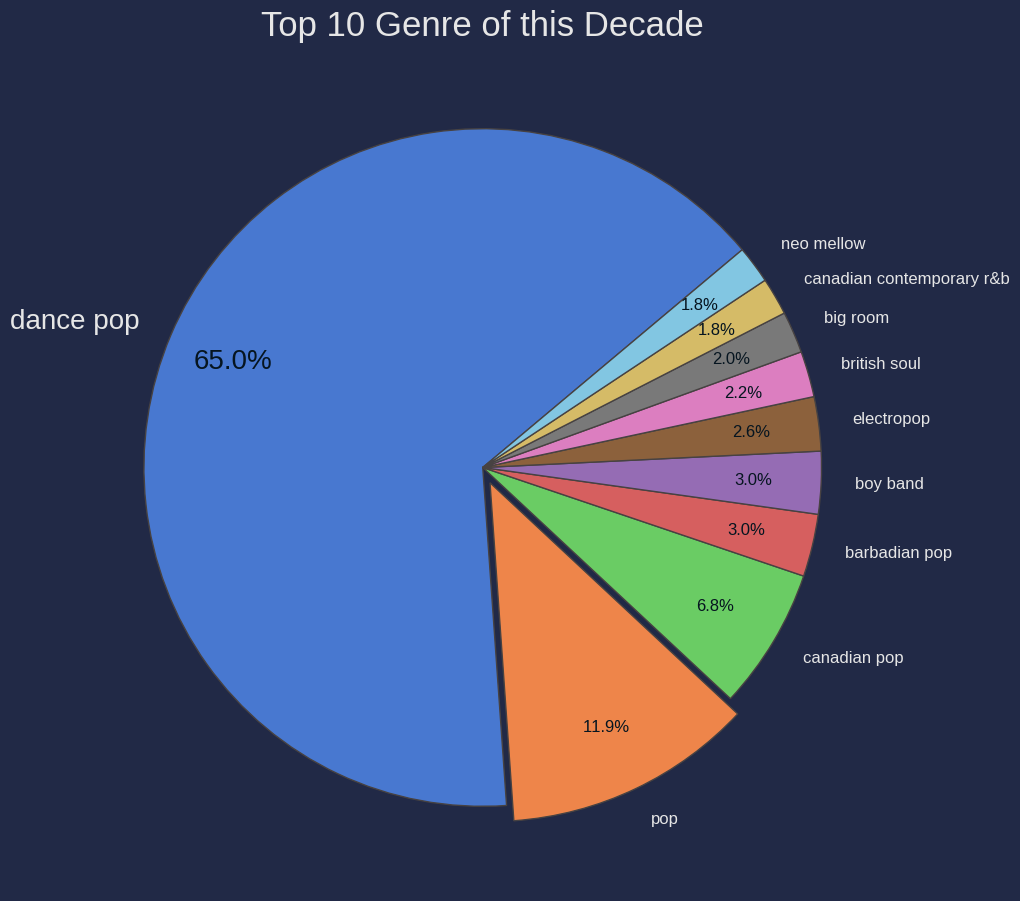

In [ ]:
plt.style.use('cyberpunk')
explode = [0, 0.05, 0, 0, 0, 0, 0, 0, 0, 0]
plt.figure(figsize=(11,11))

patches, texts, autotexts = plt.pie(top_genre,labels= top_genre.index, explode=explode, colors=sns.color_palette("muted", 10),
        startangle=40, wedgeprops={'edgecolor': '#474242'}, textprops={'fontsize': 12}, autopct='%1.1f%%', pctdistance=0.8);
for autotext in autotexts:
    autotext.set_color('#061520')

texts[0].set_fontsize(20)
autotexts[0].set_fontsize(20)
plt.title('Top 10 Genre of this Decade',fontsize=25);

So, as we can see:

- There are 50 unique genres in the top spotify songs from 2010-19
- During this timeperiod, most of the top songs belongs to the ***pop*** genre
- And in particular, **dance-pop** is the top genre on Spotify for this decade.


As a hip-hop enthusiast, it is sad to see no hip-hop genre into the top 10. But this might be a result of Spotify's diverse classification of the **Hip-Hop** Genre.
So, let us count all the hip hop songs present in this dataset.

In [ ]:
search_values = ['hip','rap']
hip_hop_count = spotify_df[spotify_df['genre'].str.contains('|'.join(search_values ))].song.count()
top_genre_name = top_genre.index.tolist()
top_genre_name.append('hip hop')
print(f'{hip_hop_count} songs are from hip-hop genre.')

23 songs are from hip-hop genre.


#### So, We can filter out the hip-hop songs using `df['genre'].str.contains('hip')`.

My bad, only 23 hiphop songs.
Let us add this to our previous pie-chart of top 10 genre.

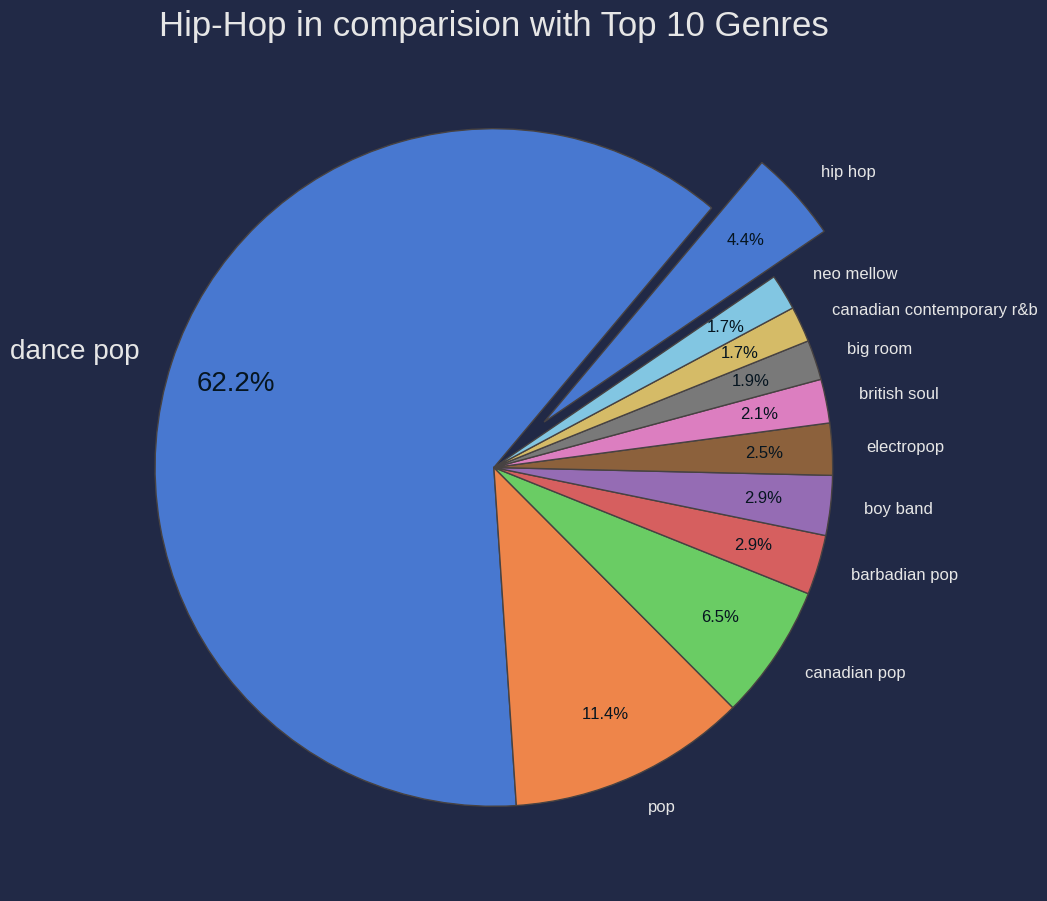

In [ ]:
plt.style.use('cyberpunk')
explode = [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0.2]
plt.figure(figsize=(11,11))

top_genre = np.append(top_genre, hip_hop_count)

patches, texts, autotexts = plt.pie(top_genre, labels= top_genre_name, explode=explode, colors=sns.color_palette("muted", 13),
        startangle=50, wedgeprops={'edgecolor': '#474242'}, textprops={'fontsize': 12}, autopct='%1.1f%%', pctdistance=0.8);
for autotext in autotexts:
    autotext.set_color('#061520')

texts[0].set_fontsize(20)
autotexts[0].set_fontsize(20)
plt.title('Hip-Hop in comparision with Top 10 Genres',fontsize=25);

### A 2. Let's have a look at our `artist` column

In [ ]:
print(f'There are {spotify_df.artist.nunique()} unique artists whose songs reached top in the charts on Spotify\n\n')

#top_artist = pd.value_counts(spotify_df.artist).iloc[:15].index
top_artist = pd.value_counts(spotify_df.artist).nlargest(15)

print('The top 5 artists are : \n')
print(top_artist.head(5))

There are 184 unique artists whose songs reached top in the charts on Spotify


The top 5 artists are : 

Katy Perry       17
Justin Bieber    16
Rihanna          15
Maroon 5         15
Lady Gaga        14
Name: artist, dtype: int64


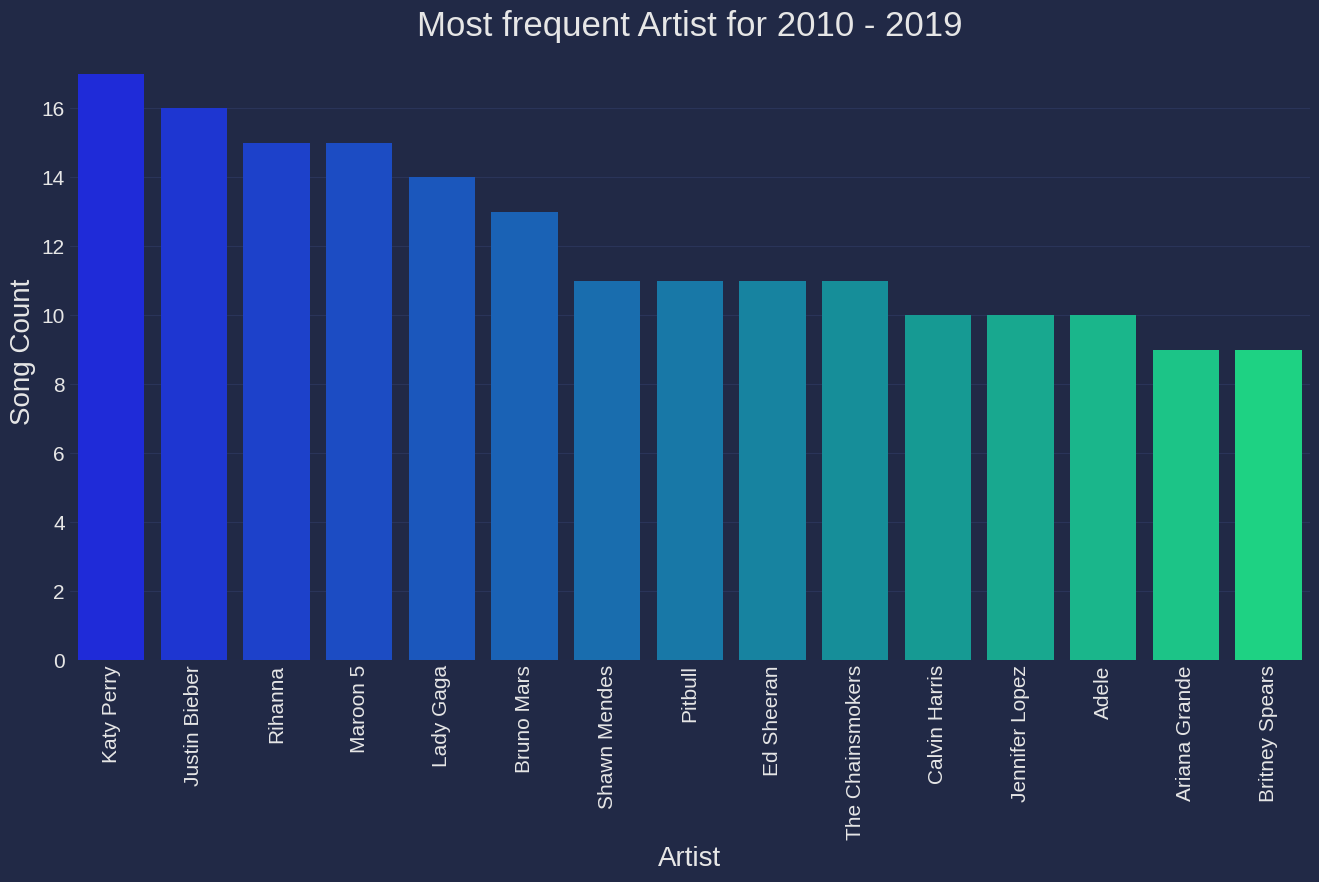

In [ ]:
plt.style.use('cyberpunk')
plt.figure(figsize=(16,8))
plt.title('Most frequent Artist for 2010 - 2019',fontsize=25)

sns.countplot(data=spotify_df, x="artist", order=top_artist.index, palette=sns.color_palette("winter",15))

plt.xlabel('Artist', fontsize=20)
plt.ylabel('Song Count', fontsize=20)
plt.xticks(size=15,rotation=90)
plt.yticks(size=15)
sns.despine(bottom=True, left=True)

plt.show()

Some insights from `artist` columns:

- There are 184 unique artists whose songs reached top in the charts on Spotify in the timeperiod of 2010-19.
- **Katy Perry** has most number of top songs on Spotify for this decade followed by **Justin Bieber** .

### A 3. Let's find out what is the Most Popular Song of this decade?

In [ ]:
top_songs = spotify_df.sort_values(by = 'popularity', ascending = False).head(10)

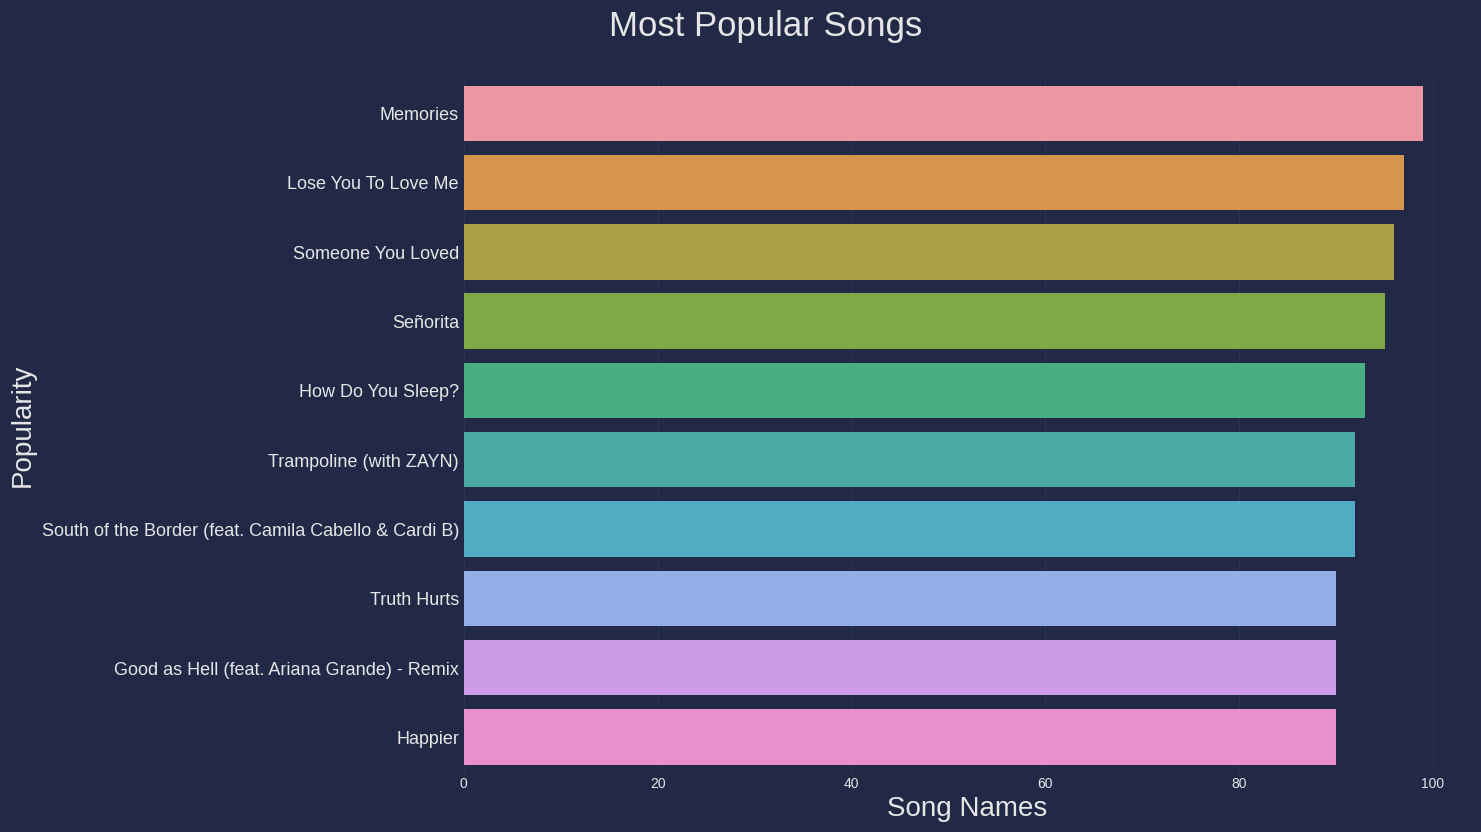

In [ ]:
plt.style.use('cyberpunk')
plt.figure(figsize = (13, 9))
fig = sns.barplot(data = top_songs, y = top_songs['song'], x= top_songs['popularity']);
plt.title("Most Popular Songs", fontsize = 25, x = 0.3, y = 1.05)
plt.xlabel('Song Names', fontsize=20)
plt.ylabel('Popularity',fontsize=20)
plt.yticks(size=13)
plt.show(fig)

### So, as we can see according to spotify, Most Popular song of Previous decade is **Memories** By Maroon 5.

## B. Let's us now analyze the numerical datas

### First we will separate all the numerical datas from main dataframe for our convenience. Let's name it `attributes`.

In [ ]:
numerics = spotify_df.select_dtypes(include= 'int64')
attributes = numerics.drop('year', axis = 1)
print(attributes.columns)

Index(['beats_per_minute', 'energy', 'danceability', 'loudness', 'liveness',
       'valence', 'length', 'acousticness', 'speechiness', 'popularity'],
      dtype='object')


### Distribution plot of All the Numerical datas for each song.

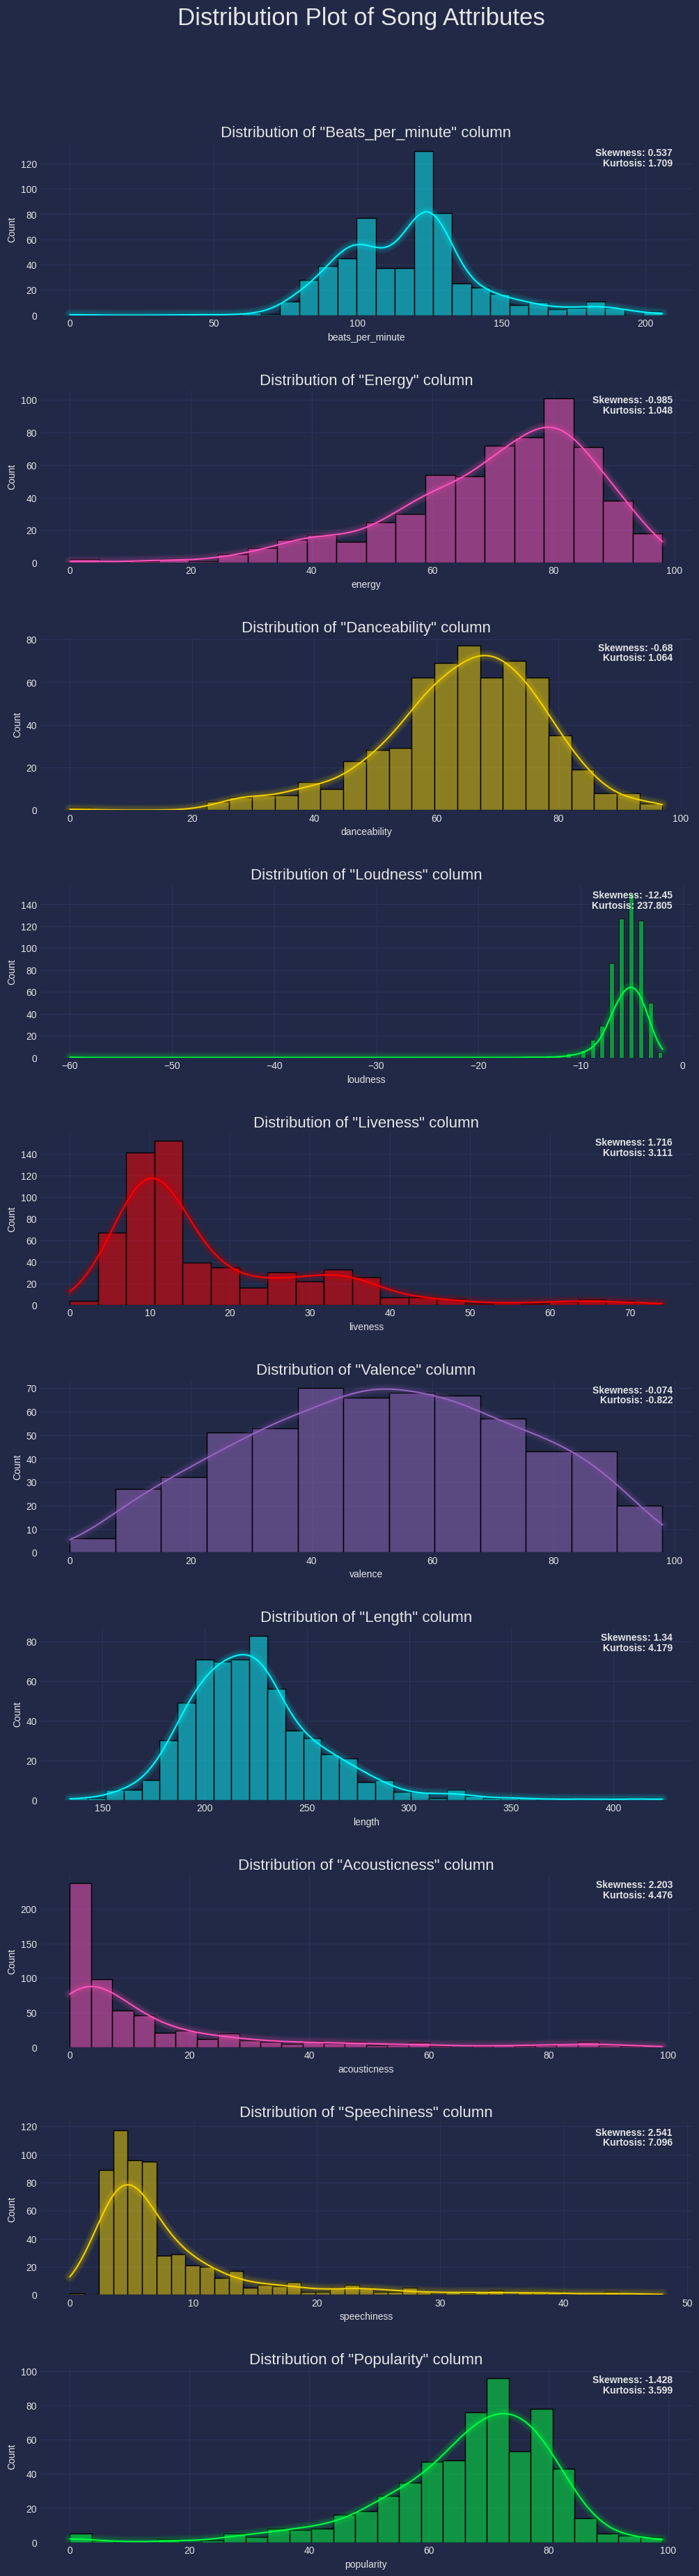

In [ ]:
plt.style.use('cyberpunk')
fig, axes = plt.subplots(len(attributes.columns),figsize=(10,3.5*len(attributes.columns)))
plt.tight_layout(h_pad=6, w_pad=5)
palette = itertools.cycle(sns.color_palette())
fig.suptitle('Distribution Plot of Song Attributes', y = 1.05, fontsize = 25)

for idx,col in enumerate(attributes.columns):
    axes[idx].set_title(f'Distribution of "{str(col).capitalize()}" column', fontsize = 16)
    axes[idx].text(x=0.97,y=0.97, transform=axes[idx].transAxes, s=f'Skewness: {round(attributes[col].skew(),3)}',fontweight="demibold",fontsize=10,verticalalignment='top',horizontalalignment='right')
    axes[idx].text(x=0.97,y=0.91, transform=axes[idx].transAxes, s=f'Kurtosis: {round(attributes[col].kurt(),3)}',fontweight="demibold",fontsize=10,verticalalignment='top',horizontalalignment='right')
    sns.histplot(attributes[col],ax=axes[idx],color=next(palette), kde=True)
    mplcyberpunk.make_lines_glow(axes[idx])



### Now, let us explore the BPM column

The Beats per Minute Column contains 104 unique BPM values, so we will group them together in four groups for classification.

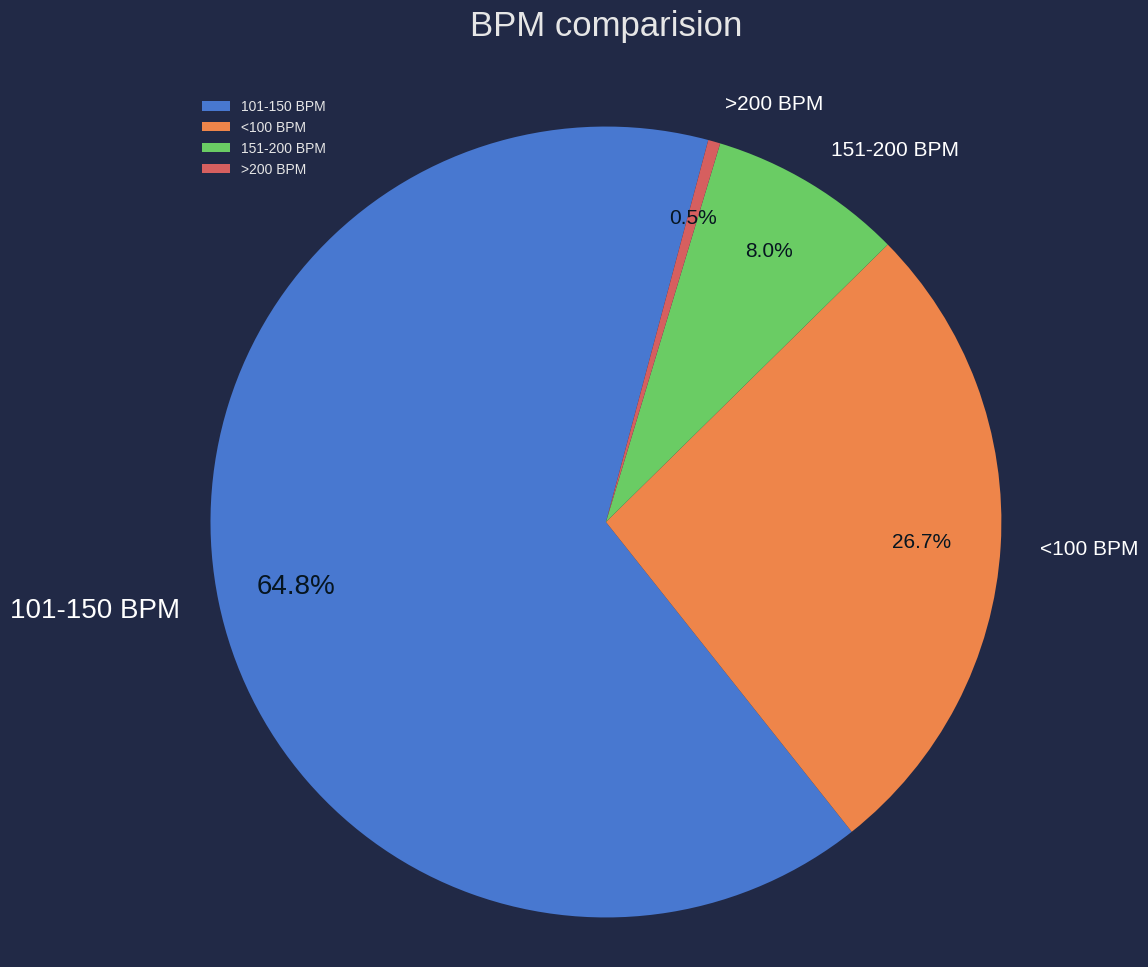

In [ ]:
def group_bpm(x):
  if x <= 100:
    return '<100 BPM'
  elif x <= 150:
    return '101-150 BPM'
  elif x <= 200:
    return '151-200 BPM'
  else:
    return '>200 BPM'



groups = spotify_df.beats_per_minute.apply(group_bpm)
values = groups.value_counts()
plt.figure(figsize = (10,9))
plt.style.use('seaborn-muted')
labels = values.index.tolist()
patches, texts, autotexts = plt.pie(values, labels = labels, colors=sns.color_palette("muted", 4),
                                    startangle=75, textprops={'fontsize': 15, 'color': '#061520'},
                                    autopct='%1.1f%%', pctdistance=0.8)
for text in texts:
    text.set_color('#ffffff')

plt.legend(patches, labels, loc="upper left")
plt.axis('equal')
plt.tight_layout()
plt.title('BPM comparision',fontsize=25, y = 1.05);
texts[0].set_fontsize(20)
autotexts[0].set_fontsize(20)
plt.show()

In [ ]:
songs_greater_than_200 = spotify_df[spotify_df['beats_per_minute'] > 200]
songs_greater_than_200[['song', 'artist']]

,song,artist
200,How Ya Doin'? (feat. Missy Elliott),Little Mix
276,FourFiveSeconds,Rihanna
362,L.A.LOVE (la la),Fergie


### So, Most of the songs( Around 65% ) are having 100-150 beats per minute(bpm).
As we can see only **0.5%** songs have `BPM > 200`. Only 3 songs belong in that list and all 3 are from *Pop female artists*.


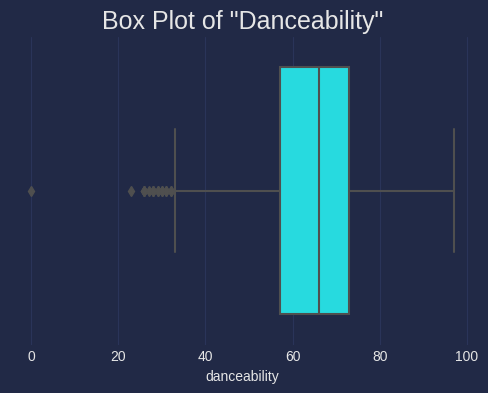

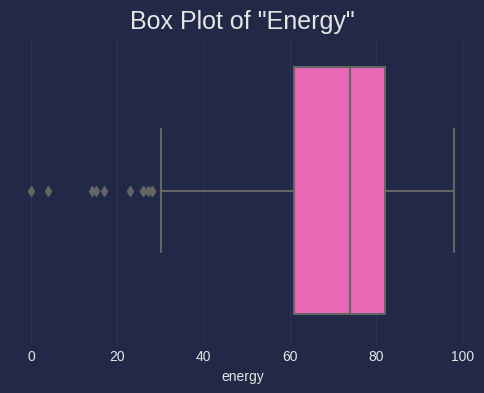

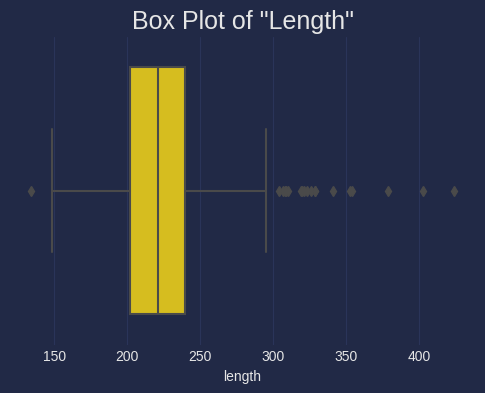

In [ ]:
plt.style.use('cyberpunk')
sns.color_palette('coolwarm')
columns = ["danceability","energy", "length"]
palette = itertools.cycle(sns.color_palette())


for col in columns:
  fig = plt.figure(figsize = (6,4))
  plt.title(f'Box Plot of "{str(col).capitalize()}"', fontsize = 18)
  sns.boxplot(x=spotify_df[col], color=next(palette))
  fig.show();

### Let's See How Various Song Attributes Affect it's Popularity

We have Selected `danceability`,`energy`, `acousticness` for this analysis.

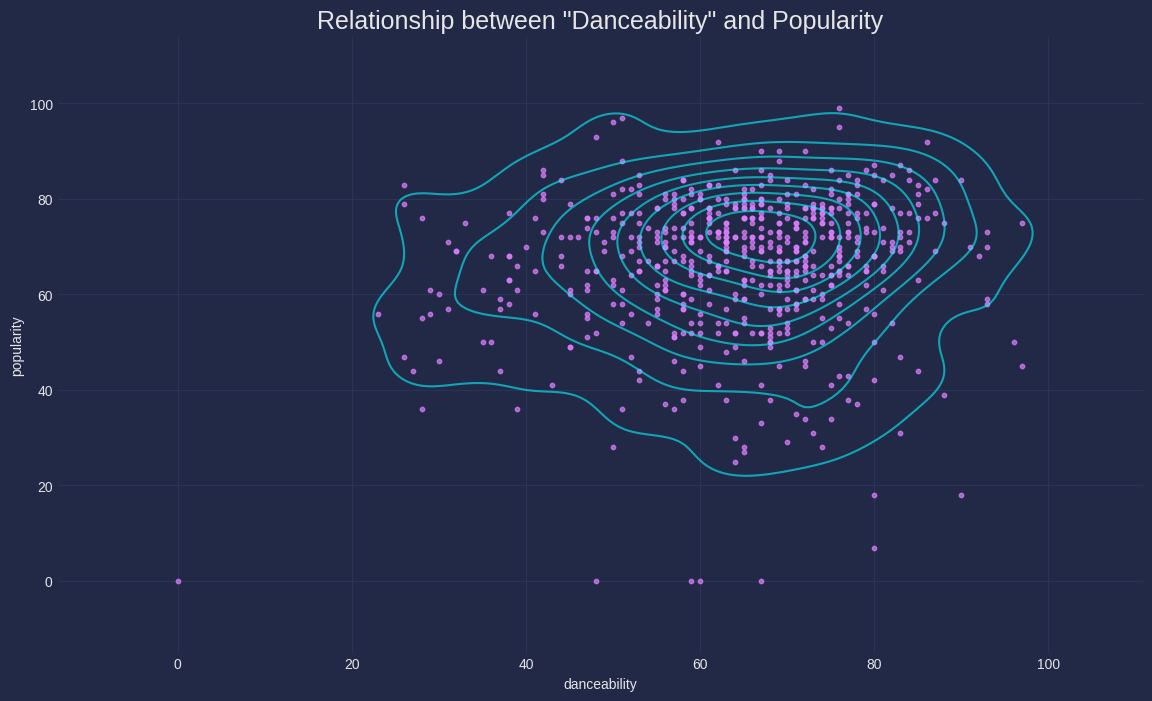

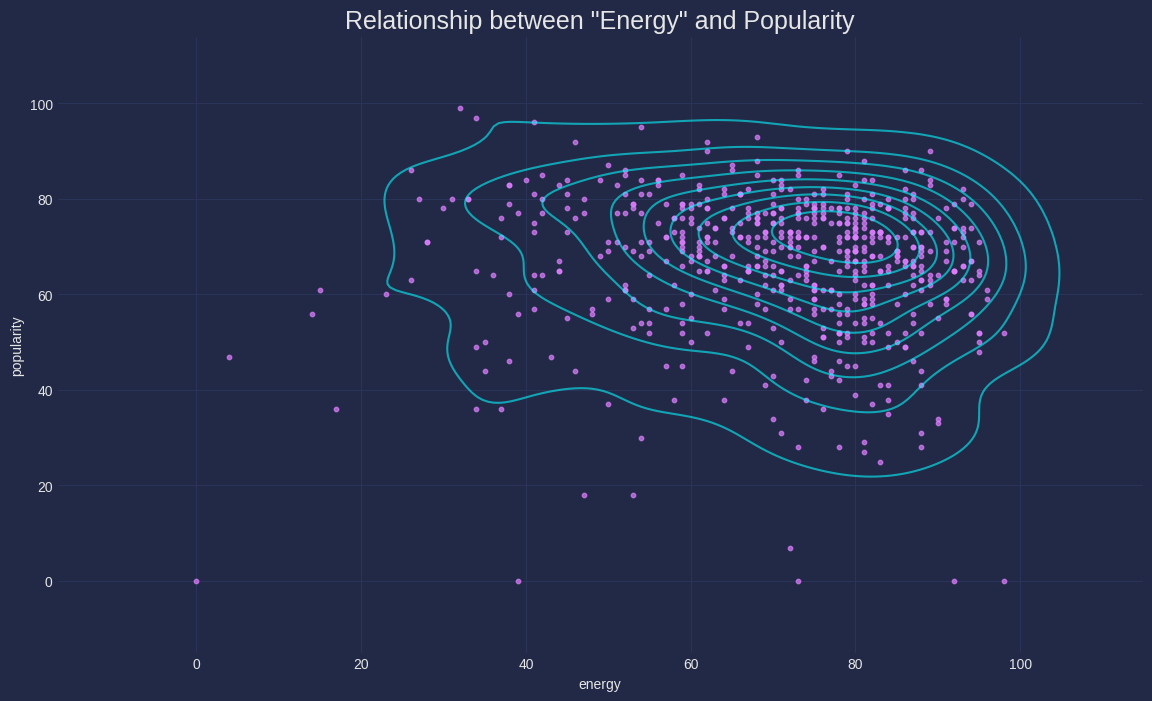

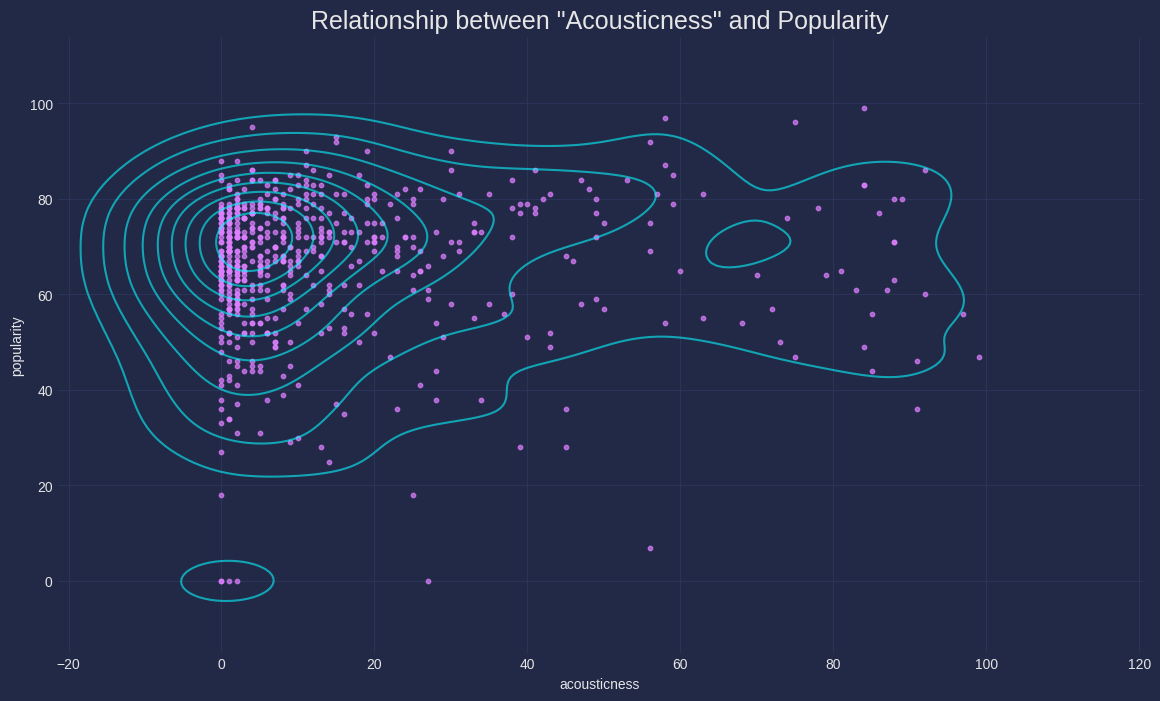

In [ ]:
plt.style.use('cyberpunk')
sns.color_palette('coolwarm')
columns = ["danceability","energy", "acousticness"]

for col in columns:
    fig = plt.figure(figsize = (14, 8));
    plt.title(f'Relationship between "{str(col).capitalize()}" and Popularity', fontsize = 18)
    sns.regplot(x = spotify_df[col], y = spotify_df.popularity, data=spotify_df, color = '#de7fff',
               fit_reg = False, scatter_kws = {'alpha' : 0.70, 's' : 10});
    sns.kdeplot(x=spotify_df[col], y=spotify_df.popularity, data=spotify_df, alpha = 0.60);
    fig.show();





###  One thing to notice that, most popular songs nowadays are highly danceable and of high energy.

####  Also, it seems like `energy` and `danceability` are almost co-related.

  Another thing, Songs with high 'acousticness' will consist mostly of natural acoustic sounds (think acoustic guitar, piano, orchestra, the unprocessed human voice), while songs with a low 'acousticness' will consists of mostly electric sounds (think electric guitars, synthesizers, drum machines, auto-tuned vocals and so on).
> So, most popular songs are made using electric sounds i.e Low `acousticness`

# Asking and Answering Questions

## Q1. Let's see how the audio characterics have evolved over the years

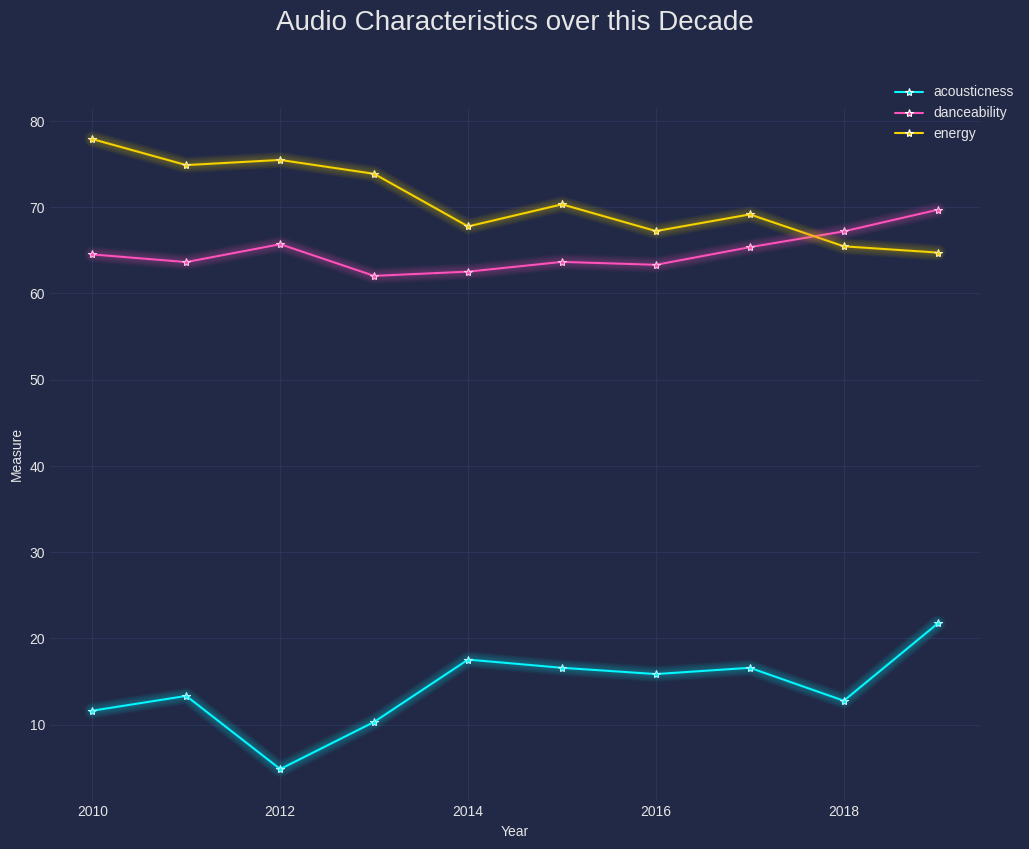

In [ ]:
plt.style.use('cyberpunk')
plt.figure(figsize=(12,9))
columns = ["acousticness","danceability","energy"]
for col in columns:
    x = spotify_df.groupby("year")[col].mean()
    ax= sns.lineplot(x=x.index,y=x,label=col, marker = '*');

ax.set_title('Audio Characteristics over this Decade', fontsize = 20, y = 1.1)
plt.legend(bbox_to_anchor=(1.05, 1.05))
ax.set_ylabel('Measure')
ax.set_xlabel('Year')
mplcyberpunk.make_lines_glow()

### As we can see, throughout this decade, Most Popular songs has almost same characteristics i.e
#### High value of `Danceability`, `Energy` and `Valance` & Low Value of `Acousticness`, `Speechiness`, `Liveness`.

## Q2. Let Us find out the most popular songs of each years

In [ ]:
pop_year = spotify_df.sort_values('popularity', ascending=False).groupby('year').first()
pop_year[['song', 'artist']]

,song,artist
year,,
2010,"Hey, Soul Sister",Train
2011,A Thousand Years,Christina Perri
2012,Titanium (feat. Sia),David Guetta
2013,Underneath the Tree,Kelly Clarkson
2014,All of Me,John Legend
2015,I'm Not The Only One,Sam Smith
2016,The Hills,The Weeknd
2017,Shape of You,Ed Sheeran
2018,One Kiss (with Dua Lipa),Calvin Harris


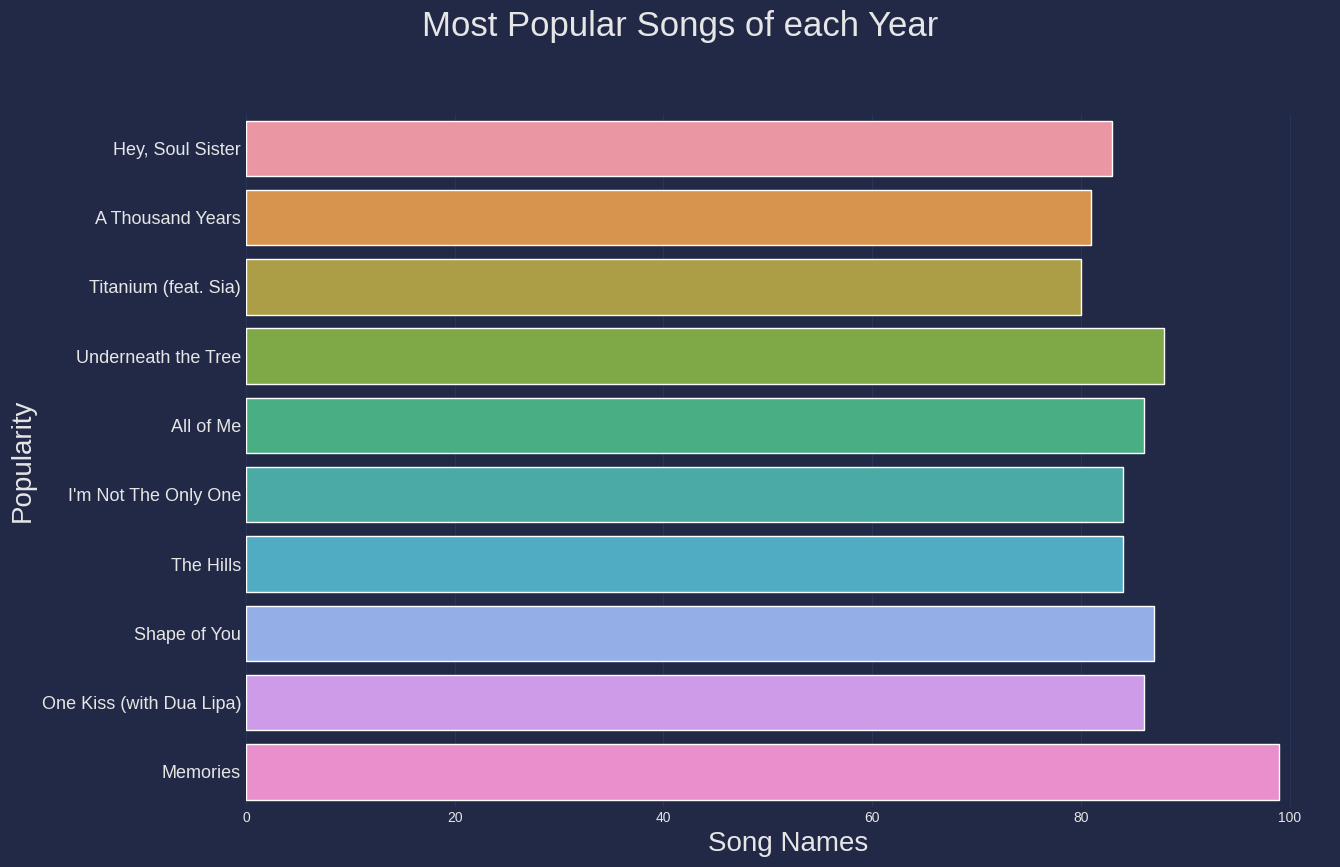

In [ ]:
plt.figure(figsize = (14, 9));
plt.title("Most Popular Songs of each Year",x = 0.4, y = 1.1, fontsize = 25)
sns.barplot(data=pop_year, x=pop_year['popularity'], y=pop_year['song']);

plt.xlabel('Song Names', fontsize=20)
plt.ylabel('Popularity',fontsize=20)
plt.yticks(size=13)
plt.show()

Here, we can see each years' Most Popular songs according to Spotify.

Another thing to notice, the popularity value of the most popular songs of each year is increasing. This might be result of today's streaming culture. Let's dive deeper.  

### Rise in Streaming Culture

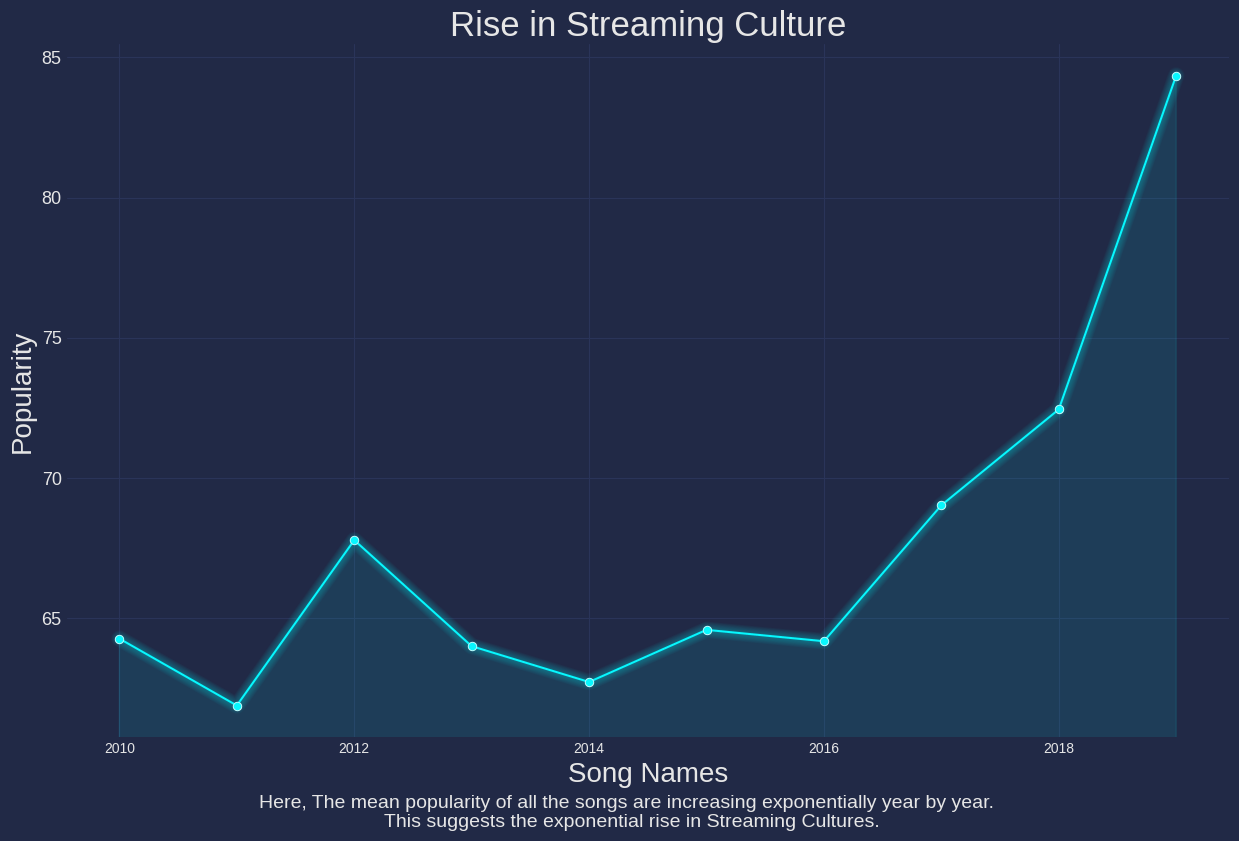

In [ ]:
plt.style.use('cyberpunk')
fig = plt.figure(figsize = (15, 9));
plt.title("Rise in Streaming Culture", fontsize = 25);
x = spotify_df.groupby("year")['popularity'].mean()
sns.lineplot(x=x.index,y=x, marker = 'o');
mplcyberpunk.add_glow_effects();
fig.text(.5, .01, "Here, The mean popularity of all the songs are increasing exponentially year by year. \n \
This suggests the exponential rise in Streaming Cultures.", ha='center', fontsize = 14);
plt.xlabel('Song Names', fontsize=20);
plt.ylabel('Popularity',fontsize=20);
plt.yticks(size=13);
plt.show()

## Q3. Are Popular songs getting shorter in duration nowadays?

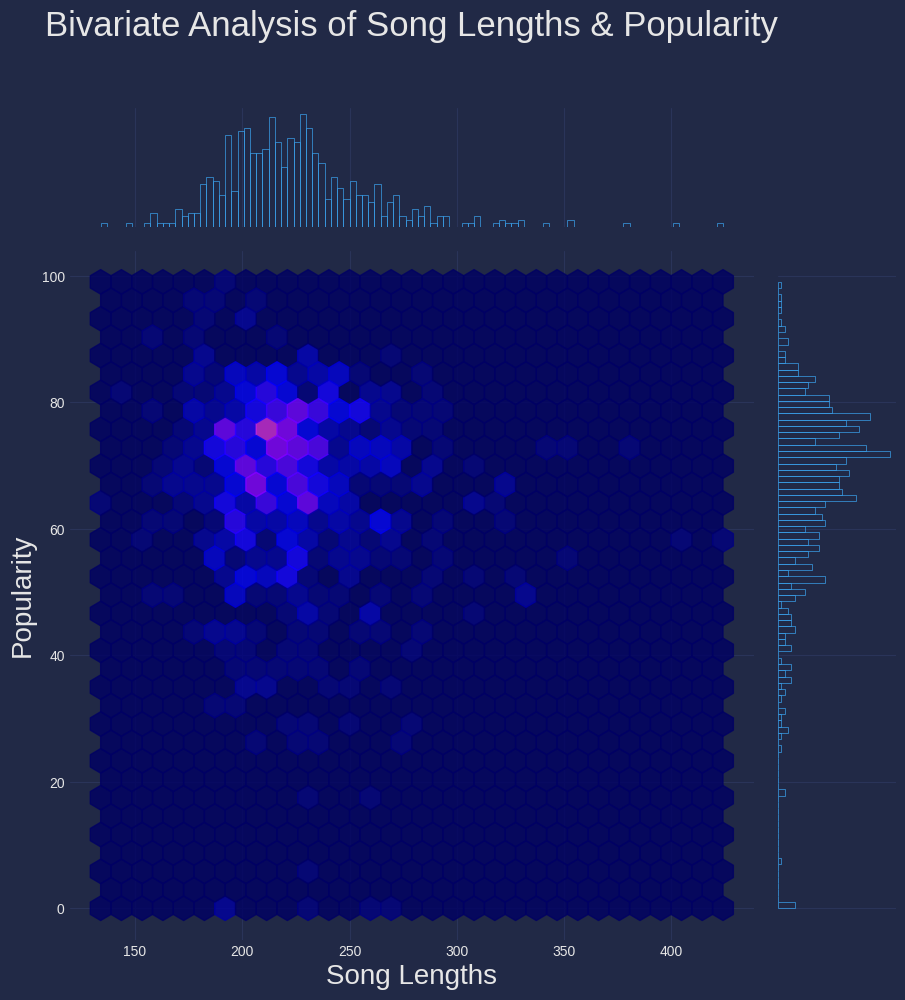

In [ ]:
sns.set_style('white')
plt.style.use('cyberpunk')

def truncate_colormap(cmap, minval=0.0, maxval=1.0, n=100):
    new_cmap = colors.LinearSegmentedColormap.from_list(
        'trunc({n},{a:.2f},{b:.2f})'.format(n=cmap.name, a=minval, b=maxval),
        cmap(np.linspace(minval, maxval, n)))
    return new_cmap

arr = np.linspace(0, 50, 100).reshape((10, 10))
# https://matplotlib.org/3.1.1/gallery/color/colormap_reference.html
cmap = plt.get_cmap('gnuplot2')
new_cmap = truncate_colormap(cmap, 0.1, 0.5)


sns.jointplot(x='length',y='popularity',data=spotify_df,
              kind='hex', cmap= new_cmap, alpha = 0.8, height = 9, color = "#3A9FEA", marginal_kws=dict(bins=100, fill=False));


plt.title("Bivariate Analysis of Song Lengths & Popularity", fontsize = 25, y = 1.3);
plt.xlabel('Song Lengths', fontsize=20)
plt.ylabel('Popularity',fontsize=20)

plt.show(fig)


According to the plot above, we can see the sweetspot between popularity and song duration is 200 - 220 sec. That's why we see almost all the songs are around 3min 20seconds these days.

### So, Songs Are Getting Shorter. [Blame the Economics of Streaming Music](https://fortune.com/2019/01/17/shorter-songs-spotify/#:~:text=If%20it%20seems%20your%20favorite,at%20three%20minutes%2C%2030%20seconds.).


In [ ]:
lengthy_songs = spotify_df.sort_values(by= 'length', ascending = False)
lengthy_songs = lengthy_songs[['song', 'artist', 'length','popularity']].head(50)

shortest_songs = spotify_df.sort_values(by= 'length')
shortest_songs= shortest_songs[['song', 'artist', 'length','popularity']].head(50)
lengthy_songs.head()

### As we have correctly guessed that all the songs which are well above 5minutes does not have that much popularity according to Spotify data.

In [ ]:
fig = plt.figure(figsize = (12,10));

sns.regplot(x = shortest_songs['length'], y = shortest_songs['popularity'], data=shortest_songs, color = '#de7fff',
               fit_reg = False, scatter_kws = {'alpha' : 0.90}, marker='+');
sns.regplot(x = lengthy_songs['length'], y = lengthy_songs['popularity'], data=lengthy_songs, color = '#00B8FF',
               fit_reg = False, scatter_kws = {'alpha' : 0.80, 's' : 25}, marker='o');

sns.kdeplot(x=shortest_songs['length'], y=shortest_songs['popularity'], data=shortest_songs, alpha = 0.40);
sns.kdeplot(x=lengthy_songs['length'], y=lengthy_songs['popularity'], data=lengthy_songs, color = '#de7fff',alpha = 0.50);

plt.title("Comparision between shorter & longer songs", fontsize = 25, y = 1.05);
plt.legend(['Short Songs', 'Long Songs'], bbox_to_anchor=(1.05, 1.05), fontsize = 15);
plt.xlabel('Song Lengths', fontsize=20)
plt.ylabel('Popularity',fontsize=20)
plt.yticks(size=13)
plt.show(fig)

## Q4. Which HipHop Artist has the more popular songs?

In [ ]:
search_values = ['hip','rap']
hip_hop_df = spotify_df[spotify_df['genre'].str.contains('|'.join(search_values ))]
hip_hop_artists = pd.value_counts(hip_hop_df.artist)

In [ ]:
plt.style.use('cyberpunk')
plt.figure(figsize=(16,8))
plt.title('Most Popular Hip Hop Artist for 2010 - 2019',fontsize=25)

sns.countplot(hip_hop_df.artist,
              palette=sns.color_palette("winter", 12))

plt.xlabel('Artist', fontsize=20)
plt.ylabel('Count', fontsize=20)
plt.xticks(size=15,rotation=90)
plt.yticks(size=15)
sns.despine(bottom=True, left=True)

Only Alicia Keys has 6 songs that appeared in top 50 yearly charts.

## Q5. Evolution of the most popular artists

In [ ]:
artists = spotify_df['artist'].value_counts().reset_index().head(3)
temp = []
topArtists = spotify_df['artist'].value_counts().head(3).index
for i in topArtists:
    temp.append(spotify_df[spotify_df['artist'] == i])
resultArtist = pd.concat(temp)

artistsYear = pd.crosstab(resultArtist["artist"],resultArtist["year"],margins=False)
artistsYear

In [ ]:
plt.figure(figsize=(16,10))

for i in artists['index']:
    tmp = []
    for y in range(2010,2020):
        songs = spotify_df[spotify_df['year'] == y][spotify_df['artist'] == i]
        tmp.append(songs.shape[0])
    sns.lineplot(x=list(range(2010,2020)),y=tmp, marker = 'o');

plt.legend(list(artists['index']), bbox_to_anchor=(0.90, 0.75), fontsize = 15)
plt.title("Evolution of Top 3 Artists through out 2010 - 2019", fontsize = 25, y = 1.1)
plt.ylabel('Song Count')
plt.xlabel('Year')
mplcyberpunk.make_lines_glow()


Looking into the previous graphs, we see that Justin Bieber, even though he is on the top 10 artists with 16 songs he only got the placement thanks to a meteoric rise between 2014 and 2016. The year 2015 alone has 9 songs of Justin Bieber.

In [ ]:
import jovian

In [ ]:
jovian.commit(project=project_name)

## Inferences and Conclusion


So, from this dataset, we can so many cool insights about People's listening behaviour of the previous decade.

### Some of insights are:

1. <font color = blue>**Dance-pop** </font>is the top genre on Spotify for this decade.
2. There are 184 unique artists whose songs reached top in the charts on Spotify in the timeperiod of 2010-19.
3. **Katy Perry** has most number of top songs(17 songs) on Spotify for this decade followed by Justin Bieber .
4. Most Popular song of Previous decade is ***Memories By Maroon 5***.
5. **Songs Are Getting Shorter** & short songs are more popular. Economics of Streaming Music is the one to blame.
6. Most of the songs( Around 65% ) are having 100-150 beats per minute(bpm).
7. Most popular songs nowadays are highly danceable and of high energy.


In [ ]:
import jovian

In [ ]:
jovian.commit(project=project_name)

## References and Future Work

### References:

- Pandas Documentation: https://pandas.pydata.org/docs/
- Matplotlib Documentation: https://matplotlib.org/3.3.2/contents.html#
- Seaborn Documentation : https://seaborn.pydata.org/
- Spotify API : https://developer.spotify.com/documentation/web-api/

and also browsing through different Kaggle notebooks on various topics for inspiration.

### Future Work:

#### 1. For a future version, we can use Spotify's API for a particular person and get their listening history. Then we can analyse the data in the same manner. Then we will be able to create Personalized Playlists for that individual.

#### 2. Also we can use this analysis to predict a song's popularity from it's audio features.



In [ ]:
import jovian

In [ ]:
jovian.commit(project=project_name)